<a href="https://colab.research.google.com/github/sree-jit/ADT-Parameter/blob/main/qutip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [3]:
!pip install qutip

     |████████████████████████████████| 14.6 MB 32.1 MB/s 


In [4]:
from qutip import *

In [6]:
q = Qobj([[1], [0]])

q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [7]:
N = 2 # number of states in the Hilbert space
n = 1 # the state that will be occupied

basis(N, n)    # equivalent to fock(N, n)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [8]:
fock(4, 2)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [9]:
def qubit_integrate(epsilon, delta, g1, g2, solver):

    H = epsilon / 2.0 * sigmaz() + delta / 2.0 * sigmax()
        
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
        
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, [sigmax(), sigmay(), sigmaz()])  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

In [10]:
epsilon = 0.0 * 2 * np.pi   # cavity frequency
delta   = 1.0 * 2 * np.pi   # atom frequency
g2 = 0.15
g1 = 0.0

# intial state
psi0 = basis(2,0)

tlist = np.linspace(0,5,200)

# analytics
sx_analytic = np.zeros(shape(tlist))
sy_analytic = -np.sin(2*np.pi*tlist) * np.exp(-tlist * g2)
sz_analytic = np.cos(2*np.pi*tlist) * np.exp(-tlist * g2)

In [11]:
sx1, sy1, sz1 = qubit_integrate(epsilon, delta, g1, g2, "me")

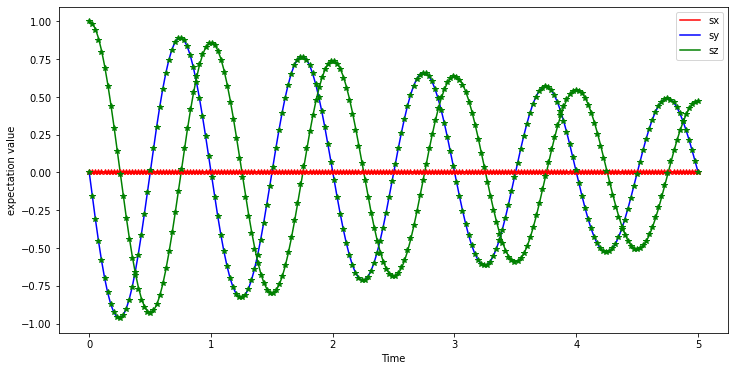

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx1), 'r')
ax.plot(tlist, np.real(sy1), 'b')
ax.plot(tlist, np.real(sz1), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'g*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

In [13]:
sx2, sy2, sz2 = qubit_integrate(epsilon, delta, 0, 0, "me")

In [14]:
sx_analytic = np.zeros(np.shape(tlist))
sy_analytic = -np.sin(2*np.pi*tlist)
sz_analytic = np.cos(2*np.pi*tlist)

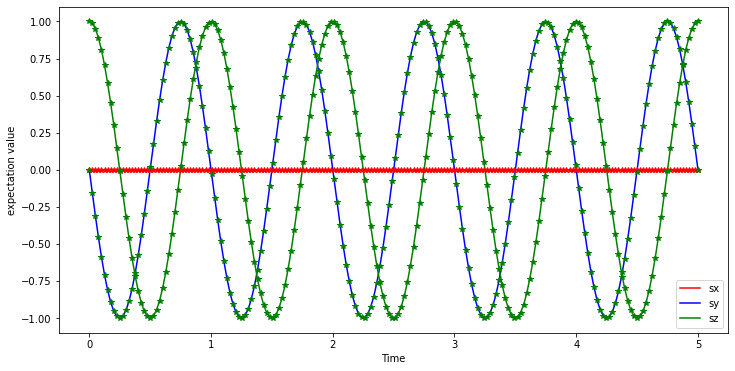

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx2), 'r')
ax.plot(tlist, np.real(sy2), 'b')
ax.plot(tlist, np.real(sz2), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'g*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

In [16]:
w     = 1.0 * 2 * np.pi   # qubit angular frequency
theta = 0.2 * np.pi       # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.05      # qubit relaxation rate
gamma2 = 0.02      # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a * basis(2,0) + (1-a)*basis(2,1))/(np.sqrt(a**2 + (1-a)**2))
tlist = np.linspace(0,15,1000)

In [17]:
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # Hamiltonian
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    sm = sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # zero temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sz)
    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output.expect[0], output.expect[1], output.expect[2]

In [18]:
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

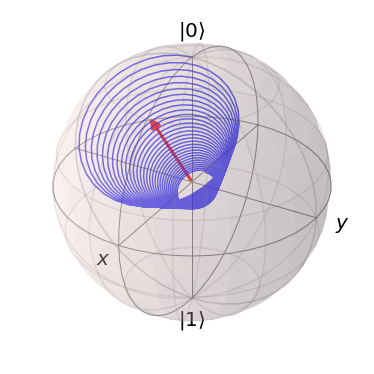

In [19]:
sphere=Bloch()
sphere.add_points([sx,sy,sz], meth='l')
sphere.vector_color = ['r']
sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
sphere.show()

In [20]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.6.2
Numpy,1.19.5
SciPy,1.4.1
matplotlib,3.2.2
Cython,0.29.24
Number of CPUs,1
BLAS Info,OPENBLAS
IPython,5.5.0
Python,"3.7.12 (default, Sep 10 2021, 00:21:48) [GCC 7.5.0]"
OS,posix [linux]


In [21]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005          # cavity dissipation rate
gamma = 0.05           # atom dissipation rate
N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

tlist = np.linspace(0,25,100)

In [22]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [23]:
c_op_list = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm)

In [24]:
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])

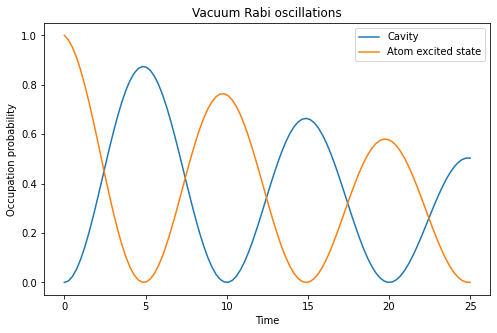

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');

In [26]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.6.2
Numpy,1.19.5
SciPy,1.4.1
matplotlib,3.2.2
Cython,0.29.24
Number of CPUs,1
BLAS Info,OPENBLAS
IPython,5.5.0
Python,"3.7.12 (default, Sep 10 2021, 00:21:48) [GCC 7.5.0]"
OS,posix [linux]
